# Calçados vendidos na Shein: relação entre preço, cor, quantidade e nível das classificações deixadas pelos clientes.

- Use o dataset proposto em aula ou busque um de sua preferência no [Kaggle](https://www.kaggle.com/).<br>
- O DataFrame escolhido concentra dados sobre a venda de sapatos no e-commerce da Shein: https://www.kaggle.com/datasets/atharvataras/shein-footwear-dataset?resource=download
- O DataFrame foi escolhido por se aproximar de uma possível situação real. Quando imaginamos nosso dia a dia como analistas de dados é muito provável (dada a quantidade e popularidade de empresas como a Shein) que tenhamos um trabalho numa empresa e que seja relacionado com vendas. A escolha visa simular nosso cotidiano nesta profissão.
- Colunas como Cor, Preço marcado, Contagem de classificação e classificação (em tradução livre) podem nos oferecer informações interessantes sobre o comportamento dos clientes do e-commerce baseado na faixa de preço dos calçados.

In [1]:
#Importamos as bibliotecas e suas subsecções, que serão usadas no código.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import sqlite3

# Análise dos dados



Aqui nesta fase trabalharemos:
- Faça a instalação das bibliotecas necessárias para tratamento de dados, sendo necessário usar pandas e numpy.
- Fazer consultas usando as funções nativas das bibliotecas utilizadas.

In [3]:
#Guardamos o nosso dataframe numa variável
df = pd.read_csv("shein_footwear_clean.csv")

In [4]:
#Código usado para mostrar as 10 primeiras colunas do arquivo csv a ser analisado.
df.head(10)

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,Womens Shoes,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,Limeiya Factory,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,Dawanfu,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,NaN,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,NaN,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,NaN,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,NaN,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,NaN,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,NaN,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


In [5]:
#usamos essa função no df que retorna uma tupla com
#o número de linhas e o número de colunas
df.shape

(899, 10)

In [6]:
#Aqui criamos uma cópia do df, um backup de segurança
df_backup = df.copy()

In [7]:
#Guardamos numa variável o número de entradas nula por cada coluna.
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

name                0
link                0
price_usd           0
mark_price_usd      0
star_rating         0
colour            209
seller_name       890
review_count        0
sku_id              0
hero_image          0
dtype: int64


In [8]:
#Guardamos numa variável o número de entradas nula por cada linha.
nulos_por_linhas = df.isnull().sum(axis=1) #O 'axis=1' aqui, especifica que as entradas sejam
#somadas horizontalmente
print(nulos_por_linhas)

0      0
1      1
2      1
3      1
4      1
      ..
894    1
895    1
896    1
897    1
898    2
Length: 899, dtype: int64


In [9]:
#função do pandas que mostra no terminal informações básicas como
#contagem, média, desvio padrão, valor mínimo e máximo e os quartis
#de cada coluna com entradas numéricas.
df.describe()

,price_usd,mark_price_usd,star_rating
count,899.000000,899.000000,899.000000
mean,17.303537,23.231624,0.043437
std,15.234275,18.266408,0.458675
min,0.610000,2.100000,0.000000
25%,11.900000,16.200000,0.000000
50%,15.800000,21.000000,0.000000
75%,19.990000,26.000000,0.000000
max,247.500000,319.070000,4.920000


In [10]:
#outra função usada para análise que retorna o tipo de cada entrada
#dentro do dataframe.
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            899 non-null    object 
 1   link            899 non-null    object 
 2   price_usd       899 non-null    float64
 3   mark_price_usd  899 non-null    float64
 4   star_rating     899 non-null    float64
 5   colour          690 non-null    object 
 6   seller_name     9 non-null      object 
 7   review_count    899 non-null    object 
 8   sku_id          899 non-null    object 
 9   hero_image      899 non-null    object 
dtypes: float64(3), object(7)
memory usage: 70.4+ KB
None


# Tratamento de dados

Nesta parte do trabalho passamos à fase de tratamento de dados:
- Utilize a biblioteca Matplotlib ou Seaborn para construir novos gráficos.
- Crie visualizações de gráficos com pandas, sendo no mínimo 4 gráficos.
- Faça  consultas em sql.
- Utilize a biblioteca Matplotlib ou Seaborn para construir novos gráficos.
- Faça um teste de hipótese.

In [11]:
#Aqui usamos a função abaixo para eliminar linhas inteiras duplicadas.
df = df.drop_duplicates()

In [12]:
#Função usada para mostrar o nome das colunas existentes no df em forma de lista.
df.columns

Index(['name', 'link', 'price_usd', 'mark_price_usd', 'star_rating', 'colour',
       'seller_name', 'review_count', 'sku_id', 'hero_image'],
      dtype='object')

In [13]:
#guardamos nesta variável a coluna 'seller_name' por consideramos que a coluna
#tinha muitos valores nulos (valores nulos em seller_name = 890/899)
# e que essa info não era necessária na nossa análise.
df = df.drop(columns=['seller_name'])

In [14]:
#Verificamos se a coluna foi removida.
df.shape

(899, 9)

In [15]:
#Aqui para nosso conforto, usamos a função rename para renomear as colunas para
#termos do nosso idioma (PT-BR)
df.rename(columns={
    'name': 'nome do anuncio',
    'link': 'link do produto',
    'price_usd':  'preço em usd',
    'mark_price_usd': 'preço marcado',
    'star_rating': 'classificação',
    'colour': 'cor',
    'review_count': 'numero de comentários',
    'sku_id': 'Ididentificador de sku',
    'hero_image': 'link da imagem'
}, inplace=True)

In [16]:
#Verificamos se os nome das colunas foi traduzido com essa
#linha de código
df.columns

Index(['nome do anuncio', 'link do produto', 'preço em usd', 'preço marcado',
       'classificação', 'cor', 'numero de comentários',
       'Ididentificador de sku', 'link da imagem'],
      dtype='object')

In [17]:
#Salvamos o documento tratado numa variável nova. Aqui, o 'index=False' serve para
#salvar o arquivo novo sem a coluna index, deixando o documento mais limpo.
df.to_csv('shein_tratado.csv', index=False)

In [18]:
#Verificamos as primeiras dez linhas do documento após as alterçãoes
df.head(10)

,nome do anuncio,link do produto,preço em usd,preço marcado,classificação,cor,numero de comentários,Ididentificador de sku,link da imagem
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


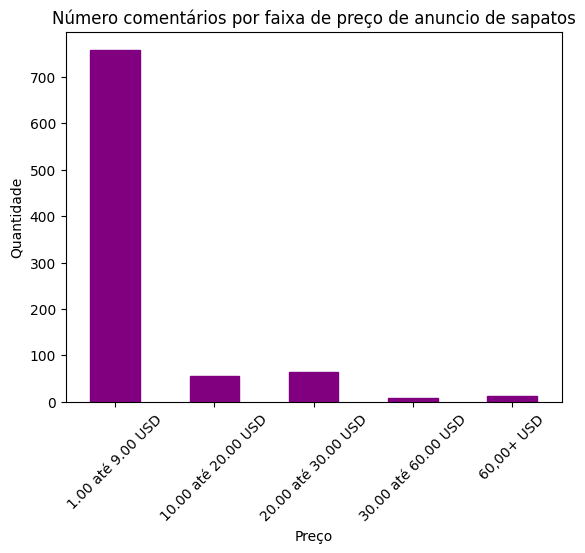

In [19]:
#Criamos a função de categorizar preços, que intera sobre cada valor da coluna
#em que for aplicada e aplica condicionais que retornarão informações que
#categorizam os preços em faixas. Usamos o range, ao invés de operadores de
#grandeza para manter o código limpo e conciso.

def categorizar_preco(valor):
    if valor > 59:
        return "60,00+ USD"
    if valor in range(29,58):
        return "30.00 até 60.00 USD"
    if valor in range(19,28):
        return "20.00 até 30.00 USD"
    if valor in range(9,18):
        return "10.00 até 20.00 USD"
    else:
        return "1.00 até 9.00 USD"


#Aplicamos função supracitada na variável 'preco'
preco = df["preço marcado"].apply(categorizar_preco)
#e fazemos contagem de valores, ordenando-os, na variável 'preco_contagem'
preco_contagem = preco.value_counts().sort_index()

#criação do gráfico
preco_contagem.plot(kind='bar', edgecolor='purple', color='purple')

#configurações
plt.xticks(rotation=45) #ângulo dos ticks para faixa de preço em 45º para
#melhor visualização
plt.xlabel("Preço")
plt.ylabel("Quantidade")
plt.title("Número comentários por faixa de preço de anuncio de sapatos")
plt.show()

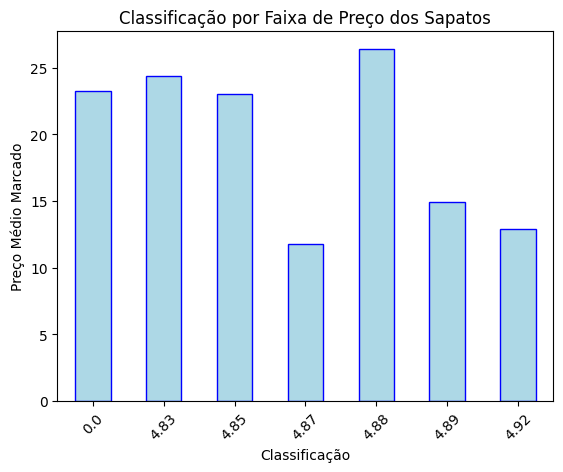

In [20]:
#contagem das classificações e preço marcado guaraddos como média nesta variável
preco_classificacao = df.groupby("classificação")["preço marcado"].mean()

#criação do gráfico
preco_classificacao.plot(kind='bar', edgecolor='blue', color='lightblue')

#configurações
plt.xticks(rotation=45)
plt.xlabel("Classificação")
plt.ylabel("Preço Médio Marcado")
plt.title("Classificação por Faixa de Preço dos Sapatos")
plt.show()

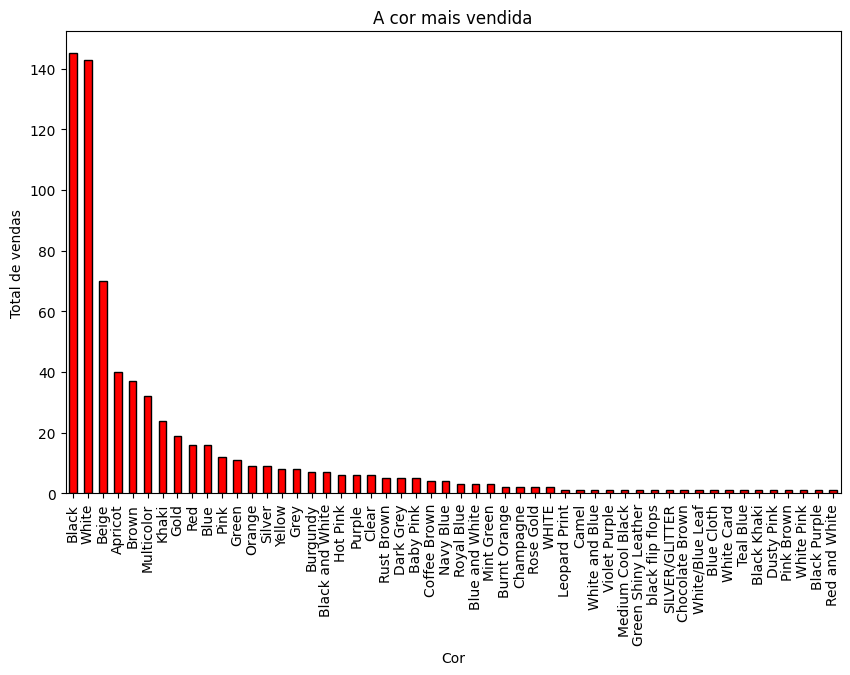

In [21]:
#Gráfico que mostra as cores mais vendidas.
color_sales = df["cor"].value_counts()

plt.figure(figsize=(10, 6))

# criação do gráfico
color_sales.plot(kind='bar', edgecolor='black', color='red')

# Configuração
plt.xticks(rotation=90) #Aqui escolhemos 90º graus para melhor visualização
plt.xlabel("Cor")
plt.ylabel("Total de vendas")
plt.title("A cor mais vendida")

plt.show()

In [22]:
#Teste de hipótese: nossa hipótese nula(h0) é se as pessoas comentam mais em sapatos com preços mais baratos ou se a hipotese alternativa (h1)
#é se as pessoas não comentam mais em sapatos com preços mais baratos.

#Teste de hipótese
preco = df["preço marcado"].dropna()
comentarios = df["numero de comentários"].apply(pd.to_numeric, errors='coerce').dropna()

#Teste t
estatistica_t, valor_p = ttest_ind(preco, comentarios)
print("Estatística t:", estatistica_t)
print("Valor p:", valor_p)

Estatística t: 0.8126872798120526
Valor p: 0.4165477947863524


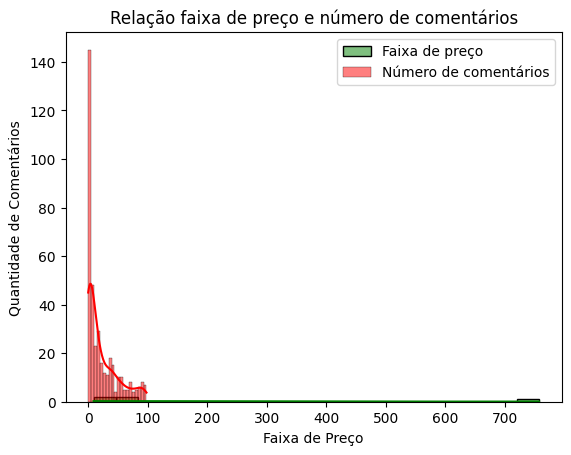

Não Rejeitamos a hipótese nula


In [24]:
#Gráfico
faixa_de_preco = df["preço marcado"].apply(categorizar_preco)
faixa_de_preco = faixa_de_preco.value_counts().sort_index()
sns.histplot(faixa_de_preco, color= 'green', label='Faixa de preço', kde=True, bins=20)
sns.histplot(comentarios, color= 'red', label='Número de comentários', kde=True, bins=20)

#Rótulos
plt.legend()
plt.title('Relação faixa de preço e número de comentários')
plt.xlabel('Faixa de Preço')
plt.ylabel('Quantidade de Comentários')
plt.show()

#Intrepretação
if valor_p < 0.05:
    print('Rejeitamos a hipótese nula')
else:
    print('Não Rejeitamos a hipótese nula')

In [25]:
amostra_df = df.sample(100)

In [26]:
amostra_df.head(3)

,nome do anuncio,link do produto,preço em usd,preço marcado,classificação,cor,numero de comentários,Ididentificador de sku,link da imagem
224,Women's Casual Sneakers Quilted Fashion Sneake...,https://us.shein.com/Women-s-Casual-Sneakers-Q...,19.99,39.99,0.0,NaN,0,sx2403060597327205,//img.ltwebstatic.com/images3_spmp/2024/03/06/...
275,Women Tie Leg Design Platform Chunky Heeled St...,https://us.shein.com/Women-Tie-Leg-Design-Plat...,25.50,32.10,0.0,White,100+,sx2304267698282280,//img.ltwebstatic.com/images3_pi/2023/05/02/16...
242,Women's New Summer Sport Shoes Pu Leather Brea...,https://us.shein.com/Women-s-New-Summer-Sport-...,19.20,23.60,0.0,NaN,0,sx2308209402717178,//img.ltwebstatic.com/images3_spmp/2023/05/28/...


In [27]:
#Saber a cor de sapato com a melhor classificação

conn = sqlite3.connect(':memory:')

amostra_df.to_sql('amostra_df', conn, index=False, if_exists='replace')

query_sql = """
SELECT cor, COUNT() AS contagem
FROM amostra_df
GROUP BY classificação = 5.0
"""

resultado_sql = pd.read_sql_query(query_sql, conn)

print(resultado_sql)
conn.close()

    cor  contagem
0  None       100
